# Lab4 - Machine Learning
# Principal Component Analysis - PCA
## 1. Standard PCA - Analysis of Covariance Matrix

As you learned in the dimensionality reduction lecture, PCA occurs as follows:
* Calculate the mean vector $\mu$ of the data
* Normalize the data to have a zero mean:

$$\mathbf{X}_n = \mathbf{X}_n - \mu, \quad n = 1,\ldots,N$$
* Construct the $d \times d$ covariance matrix:
$$\mathbf{S} = \frac{1}{N}\sum_{n=1}^{N} x_n x^T$$
where each $x_n$ is a column vector
    * $\mathbf{S}_{ii}$ (diagonal) is the variance of variable $i$
    * $\mathbf{S}_{ij}$ (off diagonal) is the covariance between variables $i$ and $j$
    
* Compute the eigenvalues and eigenvectors of the covariance matrix $\mathbf{S}$
* Keep the $k$ eigenvectors $\mathbf{U}_{:k}$ corresponding to the $k$ largest eigenvalues (principal components)
* Find the respresentation of the data in the reduced dimension
$$ z_n = \mathbf{U}^T x_n\quad n = 1,\ldots,N$$
* Project the inputs into the space spanned by the principal components: $\mathbf{X}_{reduced} = \mathbf{X}_{c} \mathbf{U}_{:k}$
* Reconstruct the initial data $$ \tilde{x_n}=\mathbf{U}z_n +\mu$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy.io

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('path/to/data')

Mounted at /content/drive


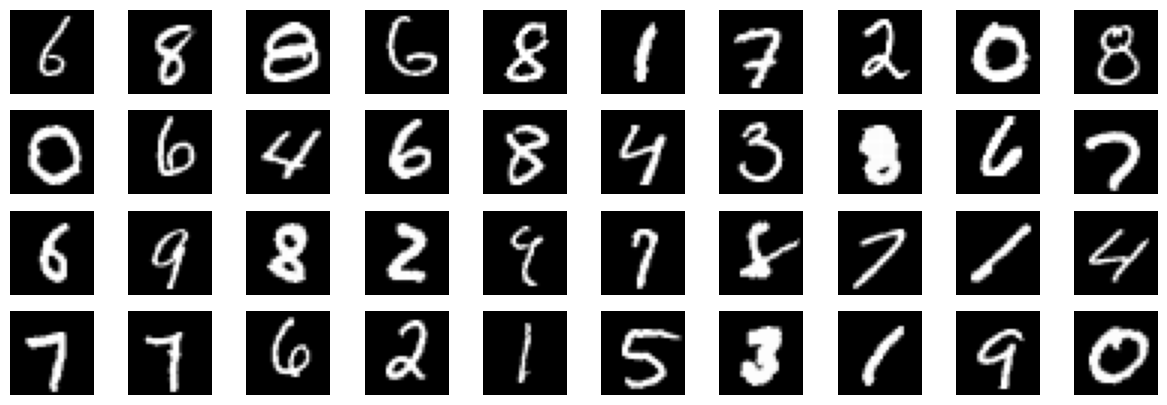

In [ ]:
def load_mnist():
    """
    Loads the MNIST dataset.
    """
    train_files = ['data/mnist/train%d.txt' % (i,) for i in range(10)]
    tmp = []
    for i in train_files:
        with open(i, 'r') as fp:
            tmp += fp.readlines()
    X = np.array([[j for j in i.split(" ")] for i in tmp], dtype='int')
    return X

def plot_mnist(X, ind =[]):
    if not len(ind):
        ind = np.random.permutation(X.shape[0])
    f = plt.figure()
    f.set_figheight(5)
    f.set_figwidth(15)
    for i in range(40):
        plt.subplot(4, 10, i+1)
        plt.axis('off')
        plt.imshow(X[ind[i]].reshape(28,28).real, cmap=plt.cm.gray)

X = load_mnist()
plot_mnist(X)

In [ ]:
def eigsort(A):
    eigvals, U = np.linalg.eig(A)
    # sort eigenvalues in descending order
    order = np.argsort(eigvals)[::-1]
    eigvals = eigvals[order]
    #re-arrange the eigenvectors
    U = U[:,order]
    return U, eigvals

In [ ]:
def pca_classic(X, M):

    #για κάθε στήλη του πίνακα X υπολογίστε το μέσο όρο, και αποθηκεύστε το σε διάνυσμα γραμμής
    mu = X.mean(axis=0).reshape( (1,-1) )

    #αφαιρέστε το μέσο όρο από τον πίνακα
    normalized_X = (X-mu)

    #υπολογίστε το Covariance matrix για τον πίνακα του προηγούμενου βήματος
    S = (1/X.shape[0]) * normalized_X.T.dot( normalized_X)

    #υπολογίστε τα ιδιοδιανύσματα και τις ιδιοτιμές του covariance πίνακα
    eigvectors, eigvals = eigsort( S )

    #κρατήστε στον πίνακα U τις πρώτες Μ στήλες των ιδιοδιανυσμάτων
    U = eigvectors[:,:M]
    #κρατήστε στον πίνακα Lambads τις πρώτες Μ ιδιοτιμές
    Lambdas = eigvals[:M]
    print( X.shape, U.shape, Lambdas.shape )

    #αποθηκεύστε το μετασχηματισμό Z = U * X ( προσέξτε τις διαστάσεις )
    #ο πίνακας U εφαρμόζεται στον κανονικοποιημένο πίνακα X και τον προβάλει
    #επάνω στα ιδιοδιανύσματα(μειωμένη διάσταση)
    Z = normalized_X.dot(U)
    return Z, U, Lambdas, mu

(60000, 784) (784, 50) (50,)


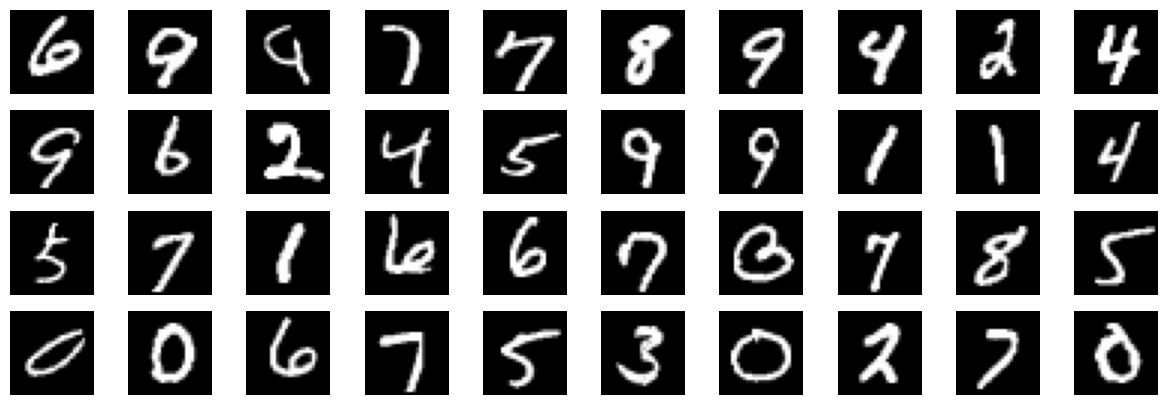

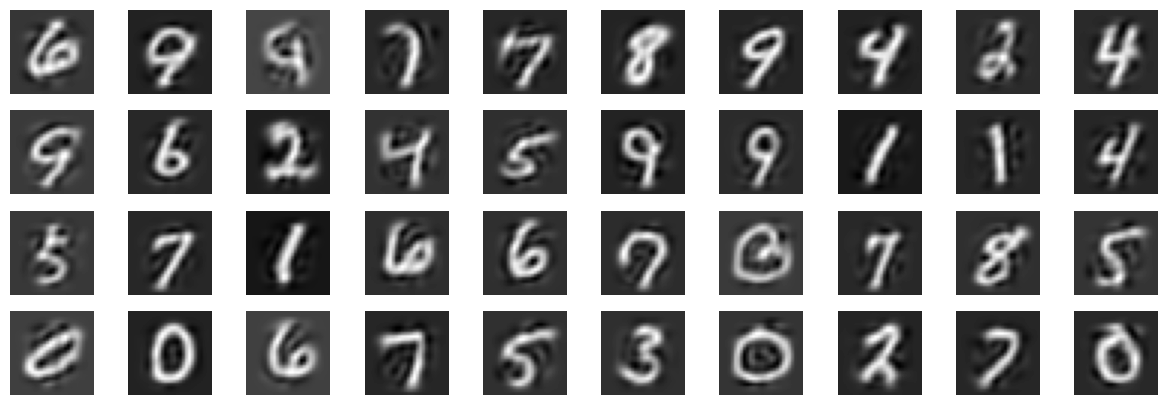

In [ ]:
X = load_mnist()
# Low dimensionality (how many eigenvectors)
M = 50
Z, eigvecs, eigvals, mu = pca_classic(X, M)
X_rec = Z.dot(eigvecs.T) + mu
ind = np.random.permutation(X.shape[0])
plot_mnist(X, ind)
plot_mnist(X_rec, ind)
#plot_mnist(X.dot(eigvecs), ind)

Now lets plot the eigenvectors

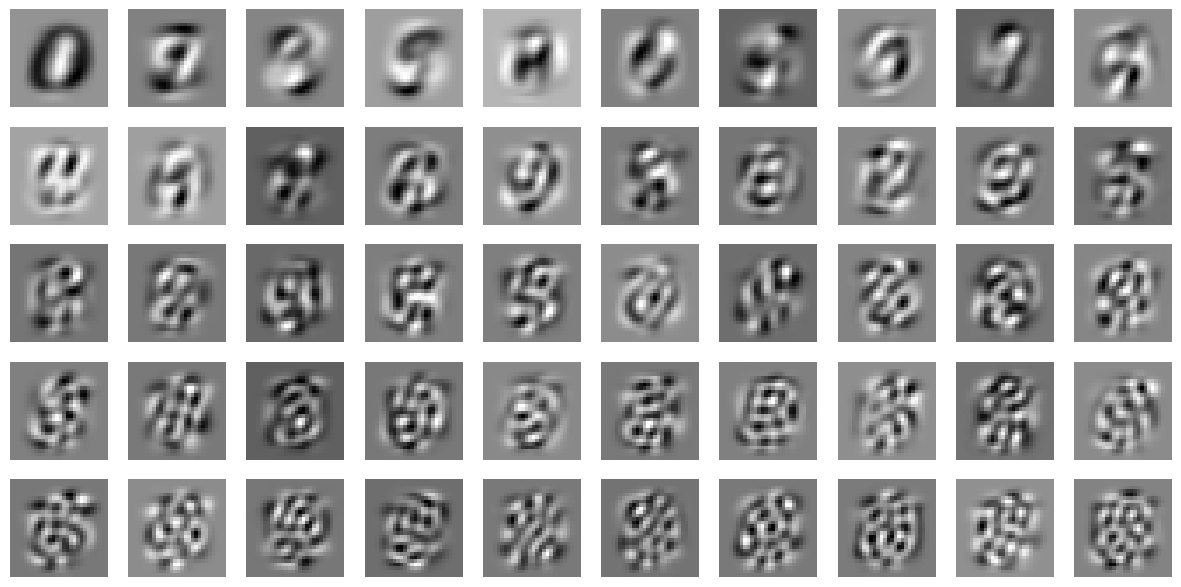

In [ ]:
f = plt.figure()
f.set_figheight(15)
f.set_figwidth(15)
if M <= 100:
    for i in range(M):
        plt.subplot(10, 10, i+1)
        plt.axis('off')
        plt.imshow(eigvecs[:,i].reshape(28,28).real, cmap=plt.cm.gray)

In [ ]:
print('Initial size', 60000*784,'vs compressed', 60000*50+784*50)

print('Compression', 60000*784/(60000*50+784*50))

Initial size 47040000 vs compressed 3039200
Compression 15.47775730455383


## 2.Using Singular Value Decomposition (SVD)

In [ ]:
def load_faces():
    """
    Load eigenfaces"""
    data = scipy.io.loadmat('data/faces.mat')
    X =  data['D'].T
    return X

def plot_faces(X, ind = []):
    if not len(ind):
        ind = np.random.permutation(X.shape[0])
    f = plt.figure()
    f.set_figheight(15)
    f.set_figwidth(15)
    for i in range(10):
        plt.subplot(10, 10, i+1)
        plt.axis('off')
        plt.imshow(X[ind[i]].reshape(92,112).T.real, cmap=plt.cm.gray)

In a simillar manner we can use Singular Value Decomposition (SVD) to perform PCA. We decompose X
using SVD:
$$ X= \mathbf{U}\mathbf{S}\mathbf{V}^T$$
 where
<ul>
  <li> $\mathbf{U}: n \times n$  matrix has as columns the eigenvectors of $\mathbf{X} \mathbf{X^T}$ </li>
  <li> $\mathbf{\Sigma}: n \times d$ is a diagonal matrix with the singular values of $\mathbf{X}$ in the diagonal (= square roots of $\mathbf{X} \mathbf{X^T}$ eigenvalues) </li>
  <li> $\mathbf{V}^T: d \times d$  matrix has as columns the eigenvectors of $\mathbf{X^T} \mathbf{X}$ </li>
</ul>
By using the function np.linalg.svd we calculate the decomposition of X. If the parameter "full_matrices" is set to True (default), U and V have the shapes ($N \times N$) and ($D \times D$), respectively. Otherwise, the shapes are ($N \times K$) and ($K \times D$), respectively, where K = min(N, D)
So in our example we have: $\mathbf{V}^T: d \times n$

The eigenvalues of the covariance matrix are given by $$ \lambda_{i} = \frac{S_{i}^2}{N} $$

The upside of SVD is that we calculate the eigenvalues of the covariance matrix without calculating the matrix itself.

In [ ]:
def pca_svd(X, M):
    N, D = X.shape

    U, S, V = np.linalg.svd(X, full_matrices=False)
    print( "U", U.shape, "S", S.shape, "V", V.shape )#το V περιέχει 400 ιδιοδιανύσματα στις γραμμές του
    #για κάθε στήλη του πίνακα X υπολογίστε το μέσο όρο, και αποθηκεύστε το σε διάνυσμα γραμμής
    mu = X.mean(axis=0)

    eigvecs = V[:M,:]#παίρνουμε τα πρώτα M ιδιοδιανύσματα
    eigvals = S[:M]
    print( 'X', X.shape, 'eigvecs', eigvecs.shape, 'eigvals', eigvals.shape )
    Z = (X-mu).dot(eigvecs.T)#αφαιρούμε το μέσο και απεικονίζουμε τα δεδομένα σε μικρότερη διάσταση (από 10304->M )
    print( 'Z', Z.shape )
    return Z, eigvecs, eigvals, mu

X.shape (400, 10304)
U (400, 400) S (400,) V (400, 10304)
X (400, 10304) eigvecs (50, 10304) eigvals (50,)
Z (400, 50)


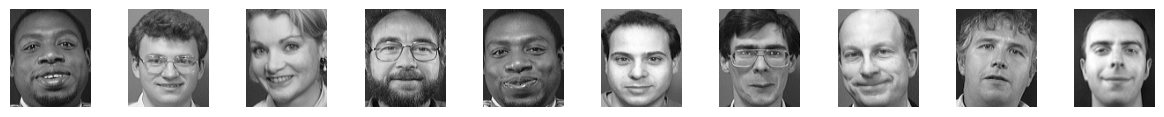

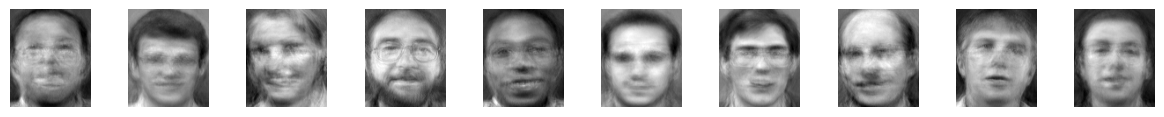

In [ ]:
X = load_faces()
print('X.shape', X.shape)
# Low dimensionality (how many eigenvectors)
M = 50
Z, eigvecs, eigvals, mu = pca_svd(X, M)
X_rec = Z.dot(eigvecs) + mu#επαναφέρουμε τα δεδομένα από τη μικρή διάσταση 200 -> 10304
ind = np.random.permutation(X.shape[0])
plot_faces(X, ind)
plot_faces(X_rec, ind)

Now lets plot the eigenvectors

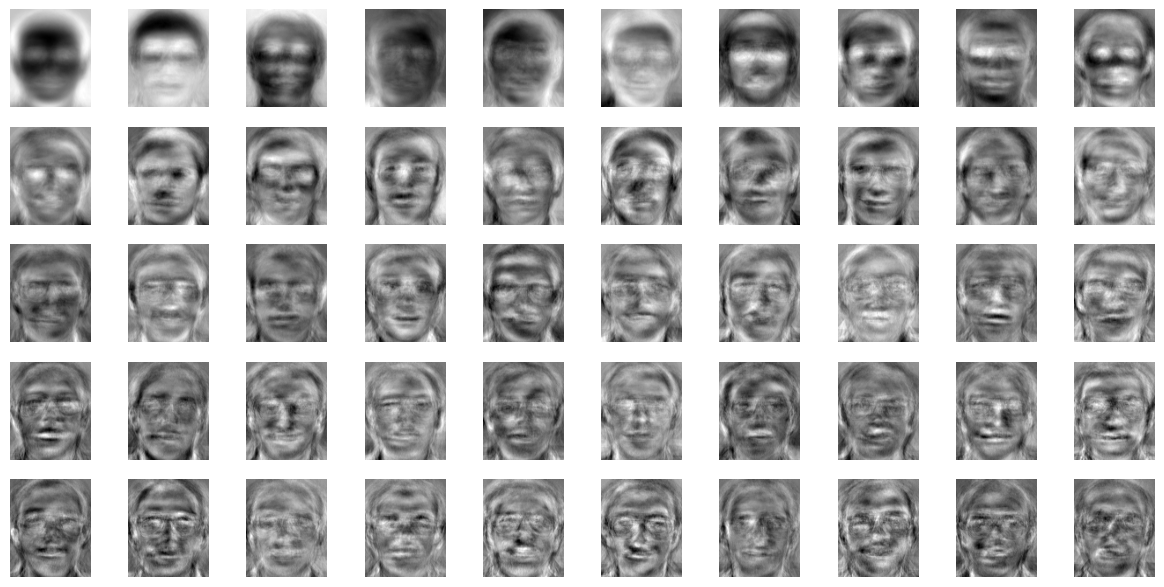

In [ ]:
f = plt.figure()
f.set_figheight(15)
f.set_figwidth(15)
if M <= 100:
    for i in range(M):
        plt.subplot(10, 10, i+1)
        plt.axis('off')
        plt.imshow(eigvecs[i,].reshape(92,112).T.real, cmap=plt.cm.gray)
plt.show()

## How many Principal components?

A simple way to select the number of the components in which we will represent our data is to set a threshold for  proportion of the variance that explains our reconstructed data will hold.
In typical scenarios the chosen components should explain at least 85% of the variance (

 $$ \frac{\sum_{i=1}^M \lambda_{i}} {\sum_{i=1}^N \lambda_{i}} \geq 0.85$$
85% of the variance is retained

In [ ]:
X = load_mnist()
# Low dimensionality (how many eigenvectors)
M = 784
Z, eigvecs, eigvals, mu = pca_classic(X, M)

(60000, 784) (784, 784) (784,)


In [ ]:
reig = eigvals.astype('float')
sum_all = reig.sum()
suma = 0
for i in range( len(reig) ):
    #αθροίστε τις ιδιοτιμές από το 0..i, και δείτε εάν ικανοποιείται το κριτήριο
    suma += reig[i]
    if suma >= 0.85 * sum_all:
        print( 'Criterion is valid when we use ', i+1, 'eigenvectors' )
        break

Criterion is valid when we use  59 eigenvectors


<ipython-input-15-959dbf5c3b49>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  reig = eigvals.astype('float')


<ipython-input-16-71075f6a2fec>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  y = [np.sum(eigvals[:m].astype('float'))/np.sum(eigvals.astype('float'))*100 for m in x]


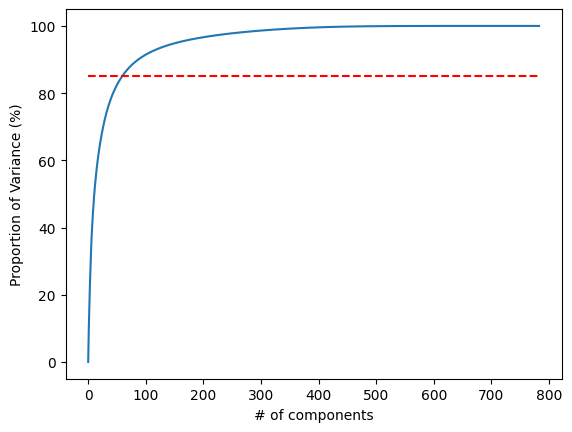

In [ ]:
# plot the proportion of explained variance for components
x = range(X.shape[1])
y = [np.sum(eigvals[:m].astype('float'))/np.sum(eigvals.astype('float'))*100 for m in x]

plt.plot(x, y)
plt.plot(x,[85]*len(x), 'r--')
plt.ylabel("Proportion of Variance (%)")
plt.xlabel("# of components")
plt.show()